# Домашнее задание №1: Классификация. 
# Логистическая регрессия и kNN.

*While the machines are being fixed.*

Формат сдачи будет объявлен позднее. Либо это будет проверяющая система, либо telegram-бот. 

<span style="color: red; font-size: 14pt">Дедлайны: 
* ФИВТ, третий курс - 4 марта 23:59
* Открытый курс - 7 марта, 23:59
</span>

### Часть 1. Небольшой numpy-разогрев. (10%)

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
# Создайте случайную матрицу A размерами 10 на 10 из целых чисел от 0 до 100
# hint: np.random.randint

A = np.random.randint(0, 100, size=(10, 10))
print(A)

[[60 51 62 96 74 29 98 61 62 39]
 [37 65 18  2 55 74 80 49 33  7]
 [10 17 81 51 95 69 38 57 34 86]
 [31 53 34 23 70 20 53 70 60 11]
 [16 21 47 45 24 96 57 27 20 52]
 [31 66 60 15 31 48 69 56 86 47]
 [43 67 93  3  0 96 92 14 67 95]
 [64 12  7 95 60 85  7 73 79 31]
 [35 52  0 51 38 91 43 44 38 51]
 [26 65 42 18 72 16 40  4 55 52]]


In [3]:
# Посчитайте средние значения в матрице по столбцам

print(np.mean(A, axis=0))

[35.3 46.9 44.4 39.9 51.9 62.4 57.7 45.5 53.4 47.1]


In [4]:
# Транспонируйте матрицу A

print(A.T)

[[60 37 10 31 16 31 43 64 35 26]
 [51 65 17 53 21 66 67 12 52 65]
 [62 18 81 34 47 60 93  7  0 42]
 [96  2 51 23 45 15  3 95 51 18]
 [74 55 95 70 24 31  0 60 38 72]
 [29 74 69 20 96 48 96 85 91 16]
 [98 80 38 53 57 69 92  7 43 40]
 [61 49 57 70 27 56 14 73 44  4]
 [62 33 34 60 20 86 67 79 38 55]
 [39  7 86 11 52 47 95 31 51 52]]


In [5]:
# Перемножьте поэлементно матрицу A и транспонированную матрицу A 

print(np.multiply(A, A.T))

[[3600 1887  620 2976 1184  899 4214 3904 2170 1014]
 [1887 4225  306  106 1155 4884 5360  588 1716  455]
 [ 620  306 6561 1734 4465 4140 3534  399    0 3612]
 [2976  106 1734  529 3150  300  159 6650 3060  198]
 [1184 1155 4465 3150  576 2976    0 1620  760 3744]
 [ 899 4884 4140  300 2976 2304 6624 4760 7826  752]
 [4214 5360 3534  159    0 6624 8464   98 2881 3800]
 [3904  588  399 6650 1620 4760   98 5329 3476  124]
 [2170 1716    0 3060  760 7826 2881 3476 1444 2805]
 [1014  455 3612  198 3744  752 3800  124 2805 2704]]


In [6]:
# Посчитайте dot product (результат матричного умножения) матрицы A на саму себя и запишите в матрицу B
# https://en.wikipedia.org/wiki/Dot_product

B = np.dot(A, A)
print(B)

[[22468 29042 29321 24950 31354 41067 37292 28744 33131 30687]
 [15954 20682 20092 14935 16475 30957 27259 18414 23505 20972]
 [15987 22832 25371 20419 28263 33552 27094 22592 27900 27802]
 [15759 17839 16783 18862 19621 31981 23545 19582 21293 20174]
 [13193 20768 21269 12222 19630 23492 23784 17715 24291 21044]
 [18134 24327 21600 19387 24918 35465 28790 22146 26688 25985]
 [18725 30615 29911 17247 29114 34929 35134 22431 31516 32220]
 [19438 23536 18365 24228 26400 29529 27610 26948 29755 19911]
 [16355 23372 18535 14877 20509 26041 26676 20065 26138 18582]
 [11844 18755 17072 12903 19047 26519 23659 14745 17027 19208]]


### Часть 2. Логистическая регрессия и kNN.

Будем работать с подвыборкой из [данных о типе лесного покрытия из репозитория UCI](http://archive.ics.uci.edu/ml/datasets/Covertype). Доступно 7 различных классов. Каждый объект описывается 54 признаками, 40 из которых являются бинарными. Описание данных доступно по ссылке, а так же в файле `covtype.info.txt`.

In [7]:
all_data = pd.read_csv('forest_dataset.csv')

Выделите 20% данных в `delayed_data` в качестве выборки, на которой будет производиться финальное сравнение моделей, в `all_data` поместите оставшиеся 80%.

In [8]:
all_data, delayed_data = train_test_split(all_data, test_size=0.2)

Выделим значения метки класса в переменную `labels`, признаковые описания в переменную `feature_matrix`. Так как данные числовые и не имеют пропусков, переведем их в `numpy`-формат с помощью метода `.values`.

In [9]:
labels = all_data[all_data.columns[-1]].values
feature_matrix = all_data[all_data.columns[:-1]].values

#### 2.1 Двуклассовая классификация (10%)

Для начала будем работать только с двумя типами лесного покрытия. Обучите линейный классификатор для разделения двух классов. Данные разделите на train и test с помощью `train_test_split`.

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

In [11]:
two_class_labels_indices = (labels == 1) + (labels == 2)

two_class_feature_matrix = feature_matrix[two_class_labels_indices]
two_class_labels = labels[two_class_labels_indices]

In [12]:
train_feature_matrix, test_feature_matrix, train_labels, test_labels = train_test_split(two_class_feature_matrix, 
                                                                                        two_class_labels, 
                                                                                        test_size=0.2)

Обучите логистическую регрессию. Оцените качество классификации на отложенной выборке с помощью `accuracy` и `f1_score` ([Wikipedia](https://en.wikipedia.org/wiki/F1_score)).

In [13]:
lr_clf = LogisticRegression()

In [14]:
lr_clf.fit(train_feature_matrix, train_labels)
pred = lr_clf.predict(test_feature_matrix)
print("accuracy = {}".format(accuracy_score(test_labels, pred)))
print("f1_score = {}".format(f1_score(test_labels, pred)))

accuracy = 0.7711988304093568
f1_score = 0.7385129490392649


#### 2.2 Многоклассовая классификация: логистическая регрессия (40%)

**Комментарий:**

*Логистическая регрессия позволяет решать и задачу многоклассовой классификации. Класс ``LogisticRegression`` позвляет это делать двумя способами:* 
- *1. Стандартный One vs Rest (т.е. каждый класс отделяется от всех других). Параметр `multi_class='ovr'`.*
- *2. Используюя кросс-энтропию (оценивается сразу вектор вероятностей принадлежности классам). Параметр `multi_class='multinomial'`.*

*По умолчанию будем использовать второй способ.*


Теперь будем работать со всеми 7 типами покрытия (данные уже находятся в переменных `feature_matrix` и `labels`, если Вы их не переопределили). Разделите выборку на обучающую и тестовую с помощью метода `train_test_split`, используйте значения параметров `test_size=0.2`, `random_state=42`. Обучите логистическую регрессию  на данном датасете.

In [31]:
lr_clf = LogisticRegression()

X_train, X_test, y_train, y_test = train_test_split(feature_matrix, labels, test_size=0.2, random_state=42)

lr_clf.fit(X_train, y_train)
y_pred = lr_clf.predict(X_test)

print("accuracy = {}".format(accuracy_score(y_test, y_pred)))
print("f1_score = {}".format(f1_score(y_test, y_pred, average=None)))

accuracy = 0.730625
f1_score = [0.73584906 0.78523077 0.65178571 0.30769231 0.         0.22222222
 0.52631579]


/usr/local/lib/python3.5/dist-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


С помощью 5-кратной кросс-валидации (`GridSearchCV`) подберите оптимальное значение параметров `С` и `penalty`. Для параметра `C` используйте набор значений `np.linspace(0.01, 1, 10)`, а для `penalty` - `['l1', 'l2']`. Критерий качества `scoring = 'accuracy'`.

In [16]:
lr_clf = LogisticRegression()
parameters = {'C': np.linspace(0.01, 1, 10), 'penalty': ['l1', 'l2']}
clf = GridSearchCV(lr_clf, parameters, scoring='accuracy', cv=5)
clf.fit(feature_matrix, labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]), 'penalty': ['l1', 'l2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

Постройте графики средних значений критерия качества `accuracy` для типов регуляризации `l1` и `l2` в зависимости от коэффициента регуляризации `C`.

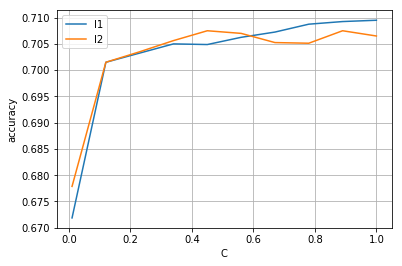

In [32]:
import matplotlib.pyplot as plt

results = {'l1': [], 'l2': []}
for params, accuracy in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    penalty, C = params['penalty'], params['C']
    assert penalty in ['l1', 'l2']
    results[penalty].append([C, accuracy])

for penalty, cv_results in results.items():
    cv_results = np.array(cv_results)
    plt.plot(cv_results[:,0], cv_results[:,1], label=penalty)

plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

Проанализируйте полученные графики. Чему равны найденные оптимальные значения параметров `C` и `penalty`?

In [33]:
print(clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])])

{'C': 1.0, 'penalty': 'l1'}


Используя найденные оптимальные значения `C` и `penalty`, обучите логистическую регрессию на обучающей выборке (train) и вычислите вероятности принадлежности к классам для тестовой (test)  выборки (`best_lr_clf.predict_proba`).

In [34]:
best_lr_clf = LogisticRegression(C=1.0, penalty='l1')

best_lr_clf.fit(X_train, y_train)
proba = best_lr_clf.predict_proba(X_test)
print(proba)

[[8.63043526e-01 1.32402596e-01 1.10490063e-05 ... 7.47844300e-05
  1.24351062e-05 4.34723346e-03]
 [5.46227967e-01 4.50514751e-01 6.66915117e-04 ... 8.49546624e-04
  7.97848046e-04 9.42858832e-04]
 [6.19434308e-01 3.65540776e-01 3.30549211e-04 ... 8.64663668e-04
  1.78605492e-03 1.20407352e-02]
 ...
 [3.56072670e-01 6.39420113e-01 8.54215178e-05 ... 4.60105452e-04
  3.08427037e-04 1.07870950e-04]
 [7.21600626e-01 2.29870538e-01 1.45621091e-05 ... 7.20724600e-04
  1.94943067e-05 4.77652948e-02]
 [7.30742337e-01 2.04030642e-01 4.56464341e-04 ... 1.65004381e-03
  2.43442898e-04 6.28769257e-02]]


Для полученной матрицы вычислите усредненные по всем объектам из тестовой выборки значения вероятностей принадлежности к классам. Сравните ее оценкой вероятности принадлежности к классу на основе частот меток классов в обучающей выборке.

In [37]:
proba = np.array(proba)
proba_mean = np.mean(proba, axis=0)
_, test_counts = np.unique(y_test, return_counts=True)
test_freq = test_counts / len(y_test)
print('proba_mean vs test_freq:')
print(np.asarray((proba_mean, test_freq)))

proba_mean vs test_freq:
[[0.36474921 0.48959076 0.05928171 0.0044074  0.0143771  0.03513455
  0.03245927]
 [0.360625   0.500625   0.058125   0.00625    0.020625   0.026875
  0.026875  ]]


#### 2.3 Многоклассовая классификация: kNN (30%).

Вспомним первое занятие. Обучите на том же датасете `KNeighborsClassifier` из `sklearn`.

In [40]:
from sklearn.neighbors import KNeighborsClassifier

{'weights': 'distance'}


Попробуйте использовать различные стратегии вычисления весов: `[‘uniform’, ‘distance’]`. Выберите одно из них самостоятельно. Чем обоснован Ваш выбор?

Переберите по сетке от `1` до `10` параметр числа соседей. Покажите на графике, как менялись значения критерия качества `accuracy` при изменении числа соседей.

In [43]:
knn = KNeighborsClassifier()
parameters = {'weights': ['uniform', 'distance'], 'n_neighbors': np.arange(1, 10)}
clf = GridSearchCV(knn, parameters, scoring='accuracy', cv=5)
clf.fit(feature_matrix, labels)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': array([1, 2, 3, 4, 5, 6, 7, 8, 9])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

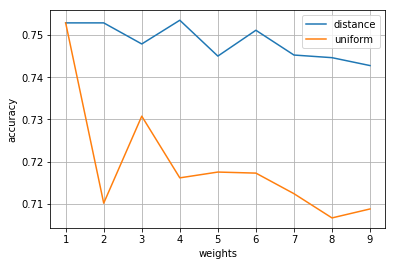

In [44]:
results = {'uniform': [], 'distance': []}
for params, accuracy in zip(clf.cv_results_['params'], clf.cv_results_['mean_test_score']):
    weights, n = params['weights'], params['n_neighbors']
    assert weights in ['uniform', 'distance']
    results[weights].append([n, accuracy])

for weights, cv_results in results.items():
    cv_results = np.array(cv_results)
    plt.plot(cv_results[:,0], cv_results[:,1], label=weights)

plt.xlabel('weights')
plt.ylabel('accuracy')
plt.legend()
plt.grid()
plt.show()

In [45]:
print(clf.cv_results_['params'][np.argmax(clf.cv_results_['mean_test_score'])])

{'n_neighbors': 4, 'weights': 'distance'}


Используя найденное оптимальное число соседей, вычислите вероятности принадлежности к классам для тестовой выборки (`.predict_proba`).

In [46]:
best_knn = KNeighborsClassifier(n_neighbors=4, weights='distance')
best_knn.fit(X_train, y_train)
proba = best_knn.predict_proba(X_test)
print(proba)

[[0.58930005 0.41069995 0.         ... 0.         0.         0.        ]
 [0.27862115 0.72137885 0.         ... 0.         0.         0.        ]
 [0.17855377 0.82144623 0.         ... 0.         0.         0.        ]
 ...
 [0.         1.         0.         ... 0.         0.         0.        ]
 [0.77334061 0.         0.         ... 0.         0.         0.22665939]
 [0.88154476 0.11845524 0.         ... 0.         0.         0.        ]]


In [47]:
proba = np.array(proba)
proba_mean = np.mean(proba, axis=0)
_, test_counts = np.unique(y_test, return_counts=True)
test_freq = test_counts / len(y_test)
print('proba_mean vs test_freq:')
print(np.asarray((proba_mean, test_freq)))

proba_mean vs test_freq:
[[0.36813866 0.49112848 0.06030698 0.00580447 0.01558891 0.0305284
  0.0285041 ]
 [0.360625   0.500625   0.058125   0.00625    0.020625   0.026875
  0.026875  ]]


#### 2.4 Сравнение результатов логистической регрессии и kNN (10%).

В реальной жизни новые данные становятся доступны с течением времени. Сравните качество Вашей лучшей модели логистической регресии и лучшего kNN  на отложенной выборке `delayed_data`. Какая из моделей показала лучший результат?

In [48]:
delayed_labels = delayed_data[delayed_data.columns[-1]].values
delayed_feature_matrix = delayed_data[delayed_data.columns[:-1]].values

best_lr_delayed_pred = best_lr_clf.predict(delayed_feature_matrix)
best_knn_delayed_pred = best_knn.predict(delayed_feature_matrix)

print('Best kNN accuracy is {}'.format(accuracy_score(best_knn_delayed_pred, delayed_labels)))
print('Best LR accuracy is {}'.format(accuracy_score(best_lr_delayed_pred, delayed_labels)))

Best kNN accuracy is 0.77
Best LR accuracy is 0.712


У лучшего kNN вышла слегка большая точность на отложенной выборке.